# Example - Handwritten digit recognition

### Introduction

This example deals with the **classification of grayscale images** of handwritten digits (28 pixels by 28 pixels), into 10 classes (0 to 9). The data come from the **MNIST data set**, a classic in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. A good classification model could be useful for scanning handwitten zipcodes.  

The MNIST data set contains 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (NIST) in the 1980s. You can think of "solving" MNIST as the "Hello World" of deep learning, what you do to verify that your algorithms are working as expected. As you become a machine learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

### The data set

The data from the 70,000 images come in seven CSV files, to fit into the size constraints of GitHub (`digits1.csv`, `digits2.csv`, etc). In these files, every row stands for an image. The first column is a label identifying the digit (0-9), and the other 784 columns correspond to the image pixels (28 x 28 = 784). The column name `ixj` must be read as the gray intensity of the pixel at the intersection of row *i* and column *j* (in the images). These intensities are integers, from 0 = Black to 255 = White (8-bit grayscale).

### Importing the data

I import the data, from each of these remote files to a **structured NumPy array**, getting seven arrays with 10,000 rows each. This may take a while, depending on your connection.

In [1]:
import numpy as np

In [2]:
path = 'https://raw.githubusercontent.com/cinnData/MLearning/main/10.%20Ensemble%20methods/'
d1 = np.genfromtxt(path + 'digits1.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
d2 = np.genfromtxt(path + 'digits2.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
d3 = np.genfromtxt(path + 'digits3.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
d4 = np.genfromtxt(path + 'digits4.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
d5 = np.genfromtxt(path + 'digits5.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
d6 = np.genfromtxt(path + 'digits6.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
d7 = np.genfromtxt(path + 'digits7.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')

Under the hood, each of these strutured array is a 1d array whose terms are tuples containing the rows of the CSV files. I can paste these seven arrays with the NumPy's `concatenate`. When applied to 1d arrays, this function concatenates them sequentially. If you a look at the structured arrays as tables, this would the same as concatenating the tables vertically. 

In [3]:
data = np.concatenate([d1, d2, d3, d4, d5, d6, d7])

Let me check that I got the data from the 70,000 images:

In [4]:
data.shape

(70000,)

Printing the data to check the contents is not feasible here. Instead, I start by examining  the first column (the label of the image) with NumPy's function `unique`. This shows that the data set is a bit unbalanced: ones are most frequent, and fives least frequent.

In [5]:
np.unique(data['label'], return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))

### Target vector and feature matrix

I set this first column as the **target vector**:

In [6]:
y = data['label']

The 784 columns containing the pixel intensities will form the **feature matrix**:

In [7]:
from numpy.lib.recfunctions import structured_to_unstructured
X = structured_to_unstructured(data)[:, 1:]

The shape is expected:

In [8]:
X.shape

(70000, 784)

The pixels values are also as expected:

In [9]:
np.unique(X)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### Plotting the images

Every row corresponds to the image of a digit. Let me visualize this by plotting the images with Matplotlib. In the first row, the 784 entries, from `1x1` to `28x28` are the pixels' gray intensities. To plot the image, I have to reshape it as a 2d array with 28 rows and 28 columns:

In [10]:
pic = X[0, :].reshape(28,28)

The `matplotlib.pyplot` function `imshow` converts this array to a picture: 

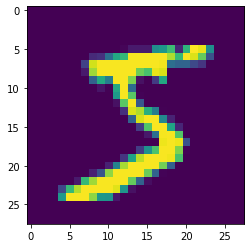

In [11]:
from matplotlib import pyplot as plt
plt.imshow(pic);

These are the default colors shown by `imshow`. To turn them into gray scale, you can use the argument `cmap='gray'`:

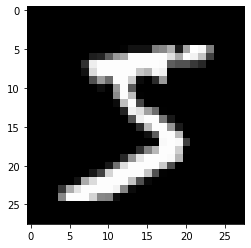

In [12]:
plt.imshow(pic, cmap='gray');

The gray scale can be set as the default with `plt.gray()`. Now, reversing the scale, we can show the picture as it were a digit written with black pencil on a white paper surface:

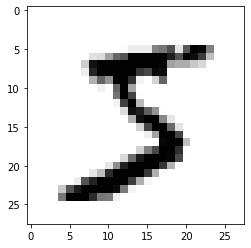

In [13]:
plt.gray()
plt.imshow(255 - pic);

This five is far from caligraphic, but still recognizable by a human eye. The second image of the data set is a zero:

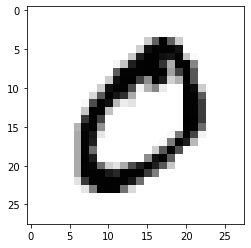

In [14]:
pic = X[1, :].reshape(28,28)
plt.imshow(255 - pic);

And the third one a four:

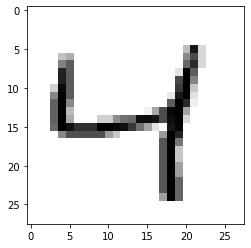

In [15]:
pic = X[2, :].reshape(28,28)
plt.imshow(255 - pic);

### Train-test split

I **split** the data set, so I can **validate** the successive classification models that I will try. I keep 10,000 pictures for testing, to follow the tradition.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7)

### Decision tree classifier

I start with a **decision tree classifier**, to get a benchmark for our ensemble models. Given the size of the data set, I set the argument `max_leaf_nodes=128` to control the growth of the tree.

In [17]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_leaf_nodes=128)

I fit the classifier to the training data and calculate the **accuracy** on both training and test data. The accuracy can be a good way to evaluate this model, since the data set is balanced and we don't have any preference for a particular digit.

In [18]:
treeclf.fit(X_train, y_train)
round(treeclf.score(X_train, y_train), 3), round(treeclf.score(X_test, y_test), 3)

(0.811, 0.799)

The accuracy is poor, in particular if we think on using the model to scan zipcodes (five digits). Even if the tree is big, we don't find evidence of **overfitting**.

### Random forest classifier

Maintaining the specification for the tree size, I try next a **random forest classifier** with 10 trees:

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(max_leaf_nodes=128, n_estimators=10)
rfclf.fit(X_train, y_train)
round(rfclf.score(X_train, y_train), 3), round(rfclf.score(X_test, y_test), 3)

(0.895, 0.889)

The improvement is quite clear. No overfitting so far. The default is `n_estimators=100`, so we increase the number of trees to 50:

In [20]:
rfclf = RandomForestClassifier(max_leaf_nodes=128, n_estimators=50)
rfclf.fit(X_train, y_train)
round(rfclf.score(X_train, y_train), 3), round(rfclf.score(X_test, y_test), 3)

(0.922, 0.918)

Still improving. With 100 trees:

In [21]:
rfclf = RandomForestClassifier(max_leaf_nodes=128, n_estimators=100)
rfclf.fit(X_train, y_train)
round(rfclf.score(X_train, y_train), 3), round(rfclf.score(X_test, y_test), 3)

(0.924, 0.921)

Slightly better, but the accuracy is getting flat. So, with a random forest classifier, we can easily achieve 90% accuracy. You can try variations on the size and the number of trees, doing a bit better. For instance, most practitioners prefer using the argument `max_depth`. Let us show two examples:

In [22]:
rfclf = RandomForestClassifier(max_depth=7, n_estimators=100)
rfclf.fit(X_train, y_train)
round(rfclf.score(X_train, y_train), 3), round(rfclf.score(X_test, y_test), 3)

(0.914, 0.91)

No improvement in this way. Using a higher values in `max_leaf_nodes` looks more promising:

In [23]:
rfclf = RandomForestClassifier(max_leaf_nodes=256, n_estimators=100)
rfclf.fit(X_train, y_train)
round(rfclf.score(X_train, y_train), 3), round(rfclf.score(X_test, y_test), 3)

(0.944, 0.938)

### Homework

1. At the every node of every tree, the random forest algorithm searches for the best split using a random subset of features. The number of features is controlled by the argument `max_features`. I have used the default, which is the square root of the number of columns of the feature matrix (`max_features='sqrt'`). This means, in this case, 28 features. Logic tells us that, increasing `max_features`, we will improve the accuracy, but the learning process (the `fit` step) will get slower. Try some variations on this, to see how it works in practice. Do you think that using the default number of features here was a good choice?

2. Develop a gradient boosting classifier for these data, using either scikit-learn's `GradientBoostingClassifier` or XGBoost's `XGBClassifier`. Take into account that a gradient boosting model is much slower to train than a random forest model with the same tree size and number of trees. A model with 100 trees and a size similar to those shown in this example can take one hour to train (less with XGBoost), though you may find a speed-up by increasing the learning rate.